<a href="https://colab.research.google.com/github/maf-mtz/Extraccion-de-caracteristicas/blob/main/Act_4_a01067198.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ACT.4 Extracción de características**
## María Fernanda Martínez Ríos
A01067198

In [370]:
#Instalamos librería para análisis de variables categóricas
!pip install funpymodeling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 

In [372]:
Micro_Retailer= pd.read_excel('microretailer_mit_lift_lab.xlsx') 

In [373]:
Micro_Retailer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


In [374]:
Micro_Retailer.shape

(171, 106)

In [375]:
Micro_Retailer.head()

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN


In [376]:
#Seleccion de las 20 columnas que utilizaré para el ánalisis
filtro=Micro_Retailer.iloc[ : , [3,9,15,24,26,27,34,35,36,47,48,50,67,65,68,71,73,86,92,96,]]
                    
filtro

,_updated_by,232_type_of_store,184_store_devices,6_change_employees_average_salary_last_year,49_inventory_records,18_sales_records,186_internet_connection,210_sales_channels,189_payment_methods,214_customer_relationship_tools,33_credit_to_customers,35_interest_rate,312_payment_of_utilities,69_why_not_services,313_home_deliveries,44_willingness_inventory_management_suppliers,46_willingness_reorder_suppliers_variety,157_frequency_organize_shelves,250_technology_investment_operations,261_technology_organization
0,Salomon Abdala Perez,Tailor,POS system (i.e. computer + bar code scanner +...,No cambió,Software especializado + computadora,Software especializado + computadora,yes,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",Redes sociales,no,NaN,NaN,NaN,NaN,NaN,NaN,Semestralmente,NaN,NaN
1,Salomon Abdala Perez,Grocery store (aka. nanostore),Dataphone (i.e. card payments),No cambió,No lo hago,No lo hago,yes,WhatsApp,"Efectivo,Transferencia interbancaria",Aplicación móvil,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Salomon Abdala Perez,Grocery store (aka. nanostore),"Dataphone (i.e. card payments),POS system (i.e...",No cambió,En Excel,Software especializado + computadora,yes,"Redes sociales (e.g. Facebook, Instagram),What...","Efectivo,Tarjeta de débito y/o crédito",Redes sociales,yes,no,NaN,NaN,NaN,NaN,NaN,Semanalmente,NaN,NaN
3,Salomon Abdala Perez,Grocery store (aka. nanostore),POS system (i.e. computer + bar code scanner +...,No cambió,Software especializado + computadora,Software especializado + computadora,yes,Llamada a Teléfono fijo,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Teléfono,no,NaN,NaN,NaN,NaN,NaN,NaN,Semanalmente,NaN,NaN
4,Salomon Abdala Perez,Grocery store (aka. nanostore),Smartphone,No cambió,En papel,En papel,yes,Llamada a Teléfono celular,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,Mensualmente,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Emilio Garza,Grocery store (aka. nanostore),"Analog cash register,Smartphone",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,Emilio Garza,Grocery store (aka. nanostore),"Analog cash register,Smartphone",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,Emilio Garza,Micro-restaurant (aka. fondita),Smartphone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,Francisco Adán,Micro-restaurant (aka. fondita),Analog cash register,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Eliminar nulos del dataframe

In [377]:
filtro.isnull().sum()

_updated_by                                        0
232_type_of_store                                  0
184_store_devices                                  0
6_change_employees_average_salary_last_year       86
49_inventory_records                              61
18_sales_records                                  61
186_internet_connection                           63
210_sales_channels                                89
189_payment_methods                               64
214_customer_relationship_tools                   76
33_credit_to_customers                            64
35_interest_rate                                 150
312_payment_of_utilities                         105
69_why_not_services                              130
313_home_deliveries                              113
44_willingness_inventory_management_suppliers     92
46_willingness_reorder_suppliers_variety          97
157_frequency_organize_shelves                    75
250_technology_investment_operations          

In [378]:
filtro =filtro.fillna("Sin registro") 
     

In [379]:
filtro.isnull().sum()

_updated_by                                      0
232_type_of_store                                0
184_store_devices                                0
6_change_employees_average_salary_last_year      0
49_inventory_records                             0
18_sales_records                                 0
186_internet_connection                          0
210_sales_channels                               0
189_payment_methods                              0
214_customer_relationship_tools                  0
33_credit_to_customers                           0
35_interest_rate                                 0
312_payment_of_utilities                         0
69_why_not_services                              0
313_home_deliveries                              0
44_willingness_inventory_management_suppliers    0
46_willingness_reorder_suppliers_variety         0
157_frequency_organize_shelves                   0
250_technology_investment_operations             0
261_technology_organization    

## Eliminar outliers del dataframe

Esta parte solo se realiza sobre las variables numéricas del data frame, en este caso, no me interesa hacer análisis sobre esas columnas, pero aun así, se hara la limpieza de outliers.

<Figure size 1500x800 with 0 Axes>

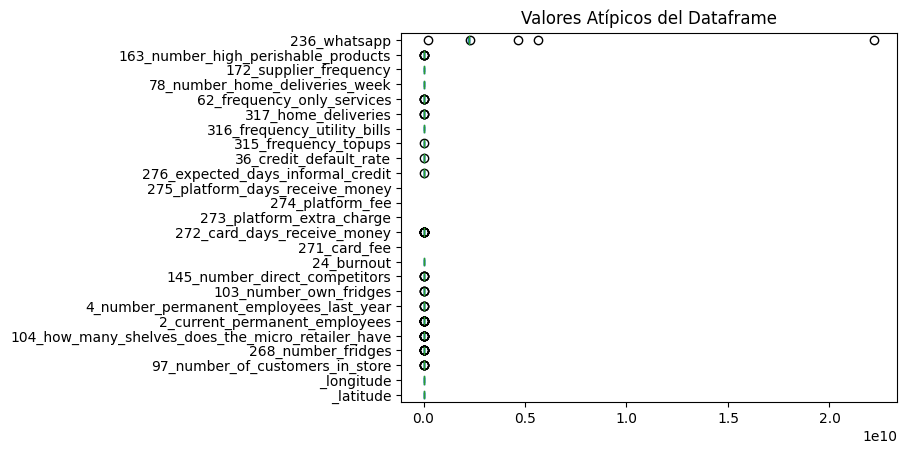

In [380]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
Micro_Retailer.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagramailtro

In [381]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=Micro_Retailer
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido _latitude                                            1.911117e+01
_longitude                                          -9.809030e+01
97_number_of_customers_in_store                      6.591777e+00
268_number_fridges                                   1.023215e+01
104_how_many_shelves_does_the_micro_retailer_have    5.581292e+01
2_current_permanent_employees                        1.646351e+01
4_number_permanent_employees_last_year               1.600420e+01
103_number_own_fridges                               1.464393e+01
145_number_direct_competitors                        1.485948e+01
24_burnout                                           1.075893e+01
271_card_fee                                                  NaN
272_card_days_receive_money                          3.682975e+00
273_platform_extra_charge                                     NaN
274_platform_fee                                              NaN
275_platform_days_receive_money                   

<ipython-input-381-7ea168a15e40>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3*y.std()
<ipython-input-381-7ea168a15e40>:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior= y.mean() + 3*y.std()
<ipython-input-381-7ea168a15e40>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence

In [382]:
#Encontramos Ouliers del Dataframe
outliers= Micro_Retailer[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

<ipython-input-382-aae5aa532ffe>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers= Micro_Retailer[(y>Limite_Superior)|(y<Limite_Inferior)]


,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [383]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
Micro_Retailer_iqr= Micro_Retailer[(y<=Limite_Superior)&(y>=Limite_Inferior)]
Micro_Retailer_iqr

<ipython-input-383-cb6a431093e2>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  Micro_Retailer_iqr= Micro_Retailer[(y<=Limite_Superior)&(y>=Limite_Inferior)]


,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,NaN,NaN,NaN,NaN,NaN,19.053536,-98.233822,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,19.053561,-98.234142,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,19.058655,-98.232300,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,19.059293,-98.233158,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,19.059585,-98.233864,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,NaN,NaN,NaN,NaN,NaN,19.043115,-98.194066,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,NaN,NaN,NaN,NaN,NaN,19.042794,-98.193802,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,NaN,NaN,NaN,NaN,NaN,19.042809,-98.193439,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,NaN,NaN,NaN,NaN,NaN,19.042558,-98.193818,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [384]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=Micro_Retailer_iqr.isnull().sum()
valores_nulos

_record_id                              171
_title                                  171
_server_updated_at                      171
_updated_by                             171
_geometry                               171
                                       ... 
234_willingness_participate_workshop    171
318_shopkeeper_name                     171
319_shopkeepers_last_name               171
236_whatsapp                            130
235_email                               171
Length: 106, dtype: int64

In [385]:
MR_clean=Micro_Retailer_iqr.copy()

MR_clean= MR_clean.fillna(0)

In [386]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=MR_clean.isnull().sum()
valores_nulos

_record_id                              0
_title                                  0
_server_updated_at                      0
_updated_by                             0
_geometry                               0
                                       ..
234_willingness_participate_workshop    0
318_shopkeeper_name                     0
319_shopkeepers_last_name               0
236_whatsapp                            0
235_email                               0
Length: 106, dtype: int64

In [387]:
MR_clean

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,0,0,0,0,0,19.053536,-98.233822,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0
1,0,0,0,0,0,19.053561,-98.234142,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0
2,0,0,0,0,0,19.058655,-98.232300,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0
3,0,0,0,0,0,19.059293,-98.233158,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0
4,0,0,0,0,0,19.059585,-98.233864,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0,0,0,0,0,19.043115,-98.194066,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0
167,0,0,0,0,0,19.042794,-98.193802,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0
168,0,0,0,0,0,19.042809,-98.193439,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0
169,0,0,0,0,0,19.042558,-98.193818,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0


## Análisis univariado

In [388]:
#Extraer características a partir de aplicar un análisis univariado, a diferentes variables categóricas (20). 
#Mostrar los resultados obtenidos ,mediante gráficas y tablas
filtro.head()

,_updated_by,232_type_of_store,184_store_devices,6_change_employees_average_salary_last_year,49_inventory_records,18_sales_records,186_internet_connection,210_sales_channels,189_payment_methods,214_customer_relationship_tools,33_credit_to_customers,35_interest_rate,312_payment_of_utilities,69_why_not_services,313_home_deliveries,44_willingness_inventory_management_suppliers,46_willingness_reorder_suppliers_variety,157_frequency_organize_shelves,250_technology_investment_operations,261_technology_organization
0,Salomon Abdala Perez,Tailor,POS system (i.e. computer + bar code scanner +...,No cambió,Software especializado + computadora,Software especializado + computadora,yes,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",Redes sociales,no,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Semestralmente,Sin registro,Sin registro
1,Salomon Abdala Perez,Grocery store (aka. nanostore),Dataphone (i.e. card payments),No cambió,No lo hago,No lo hago,yes,WhatsApp,"Efectivo,Transferencia interbancaria",Aplicación móvil,no,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro
2,Salomon Abdala Perez,Grocery store (aka. nanostore),"Dataphone (i.e. card payments),POS system (i.e...",No cambió,En Excel,Software especializado + computadora,yes,"Redes sociales (e.g. Facebook, Instagram),What...","Efectivo,Tarjeta de débito y/o crédito",Redes sociales,yes,no,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Semanalmente,Sin registro,Sin registro
3,Salomon Abdala Perez,Grocery store (aka. nanostore),POS system (i.e. computer + bar code scanner +...,No cambió,Software especializado + computadora,Software especializado + computadora,yes,Llamada a Teléfono fijo,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Teléfono,no,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Semanalmente,Sin registro,Sin registro
4,Salomon Abdala Perez,Grocery store (aka. nanostore),Smartphone,No cambió,En papel,En papel,yes,Llamada a Teléfono celular,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Sin registro,yes,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Mensualmente,Sin registro,Sin registro


In [389]:
freq_tbl(filtro)

                          _updated_by  frequency  percentage  cumulative_perc
0                Salomon Abdala Perez         20    0.116959         0.116959
1   Ángel Francisco Altamirano Campos         16    0.093567         0.210526
2                         José Zapata         14    0.081871         0.292398
3                        Emilio Garza         13    0.076023         0.368421
4                    Benjamin Barbosa         13    0.076023         0.444444
5                     Pedro Contreras         12    0.070175         0.514620
6                      Eduardo Zárate          9    0.052632         0.567251
7                    Alejandro Matias          8    0.046784         0.614035
8                     Harry Hernández          7    0.040936         0.654971
9                      Francisco Adán          7    0.040936         0.695906
10                      Hiram Jiménez          6    0.035088         0.730994
11                       Ismael López          6    0.035088    

### Columnas

In [390]:
filtro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   _updated_by                                    171 non-null    object
 1   232_type_of_store                              171 non-null    object
 2   184_store_devices                              171 non-null    object
 3   6_change_employees_average_salary_last_year    171 non-null    object
 4   49_inventory_records                           171 non-null    object
 5   18_sales_records                               171 non-null    object
 6   186_internet_connection                        171 non-null    object
 7   210_sales_channels                             171 non-null    object
 8   189_payment_methods                            171 non-null    object
 9   214_customer_relationship_tools                171 non-null    ob

### Variable 1: _updated_by

In [391]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(filtro['_updated_by'])
table1



,_updated_by,frequency,percentage,cumulative_perc
0,Salomon Abdala Perez,20,0.116959,0.116959
1,Ángel Francisco Altamirano Campos,16,0.093567,0.210526
2,José Zapata,14,0.081871,0.292398
3,Emilio Garza,13,0.076023,0.368421
4,Benjamin Barbosa,13,0.076023,0.444444
5,Pedro Contreras,12,0.070175,0.514620
6,Eduardo Zárate,9,0.052632,0.567251
7,Alejandro Matias,8,0.046784,0.614035
8,Harry Hernández,7,0.040936,0.654971
9,Francisco Adán,7,0.040936,0.695906


In [392]:
filtro['_updated_by'].nunique()

31

In [393]:
filtro['_updated_by'].value_counts()

Salomon Abdala Perez                 20
Ángel Francisco Altamirano Campos    16
José Zapata                          14
Emilio Garza                         13
Benjamin Barbosa                     13
Pedro Contreras                      12
Eduardo Zárate                        9
Alejandro Matias                      8
Harry Hernández                       7
Francisco Adán                        7
Hiram Jiménez                         6
Ismael López                          6
Mauro Munguía                         4
Alan Bravo                            4
Sandra Carreón                        4
Jorge Mason                           3
Jesús Herrera                         3
Ricardo Galindo Bulos                 3
Yael Loeza                            2
Manuel Flores                         2
Juan Spínola                          2
Azael Mendoza                         2
Irvin Vásquez Figueroa                2
Sebastian Salem Barranco Olvera       2
Jesús Antonio Zapatero García         1


In [394]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
f= table1[table1['frequency']>5]
f
     

,_updated_by,frequency,percentage,cumulative_perc
0,Salomon Abdala Perez,20,0.116959,0.116959
1,Ángel Francisco Altamirano Campos,16,0.093567,0.210526
2,José Zapata,14,0.081871,0.292398
3,Emilio Garza,13,0.076023,0.368421
4,Benjamin Barbosa,13,0.076023,0.444444
5,Pedro Contreras,12,0.070175,0.514620
6,Eduardo Zárate,9,0.052632,0.567251
7,Alejandro Matias,8,0.046784,0.614035
8,Harry Hernández,7,0.040936,0.654971
9,Francisco Adán,7,0.040936,0.695906


In [395]:
#Ajusto el indice de mi dataframe
Filtro_index= f.set_index('_updated_by')
Filtro_index

,frequency,percentage,cumulative_perc
_updated_by,,,
Salomon Abdala Perez,20,0.116959,0.116959
Ángel Francisco Altamirano Campos,16,0.093567,0.210526
José Zapata,14,0.081871,0.292398
Emilio Garza,13,0.076023,0.368421
Benjamin Barbosa,13,0.076023,0.444444
Pedro Contreras,12,0.070175,0.514620
Eduardo Zárate,9,0.052632,0.567251
Alejandro Matias,8,0.046784,0.614035
Harry Hernández,7,0.040936,0.654971


Text(0, 0.5, 'Frecuencia')

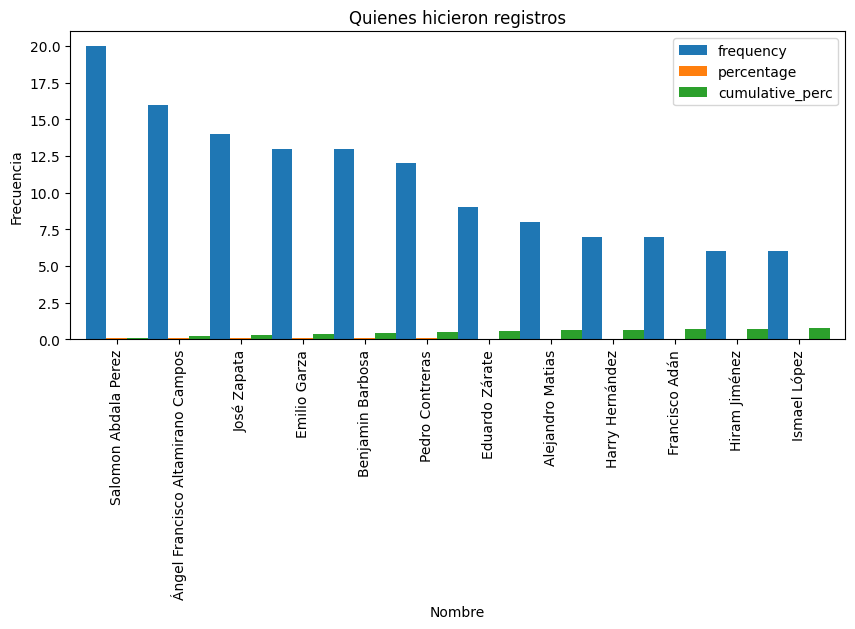

In [396]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Quienes hicieron registros')
plt.xlabel('Nombre')
plt.ylabel('Frecuencia')
     

### Variable 2: 232_type_of_store

In [397]:
#Obtengo un análisis univariado de una variable categórica en específico
table2= freq_tbl(filtro['232_type_of_store'])
table2


,232_type_of_store,frequency,percentage,cumulative_perc
0,Grocery store (aka. nanostore),52,0.304094,0.304094
1,Micro-restaurant (aka. fondita),31,0.181287,0.485380
2,Dairy products,10,0.058480,0.543860
3,Cafeteria,6,0.035088,0.578947
4,Butcher shop,6,0.035088,0.614035
...,...,...,...,...
59,joyeria,1,0.005848,0.976608
60,dulceria,1,0.005848,0.982456
61,Ropa,1,0.005848,0.988304
62,Ferretería,1,0.005848,0.994152


In [398]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
f= table2[table2['frequency']>5]
f    

,232_type_of_store,frequency,percentage,cumulative_perc
0,Grocery store (aka. nanostore),52,0.304094,0.304094
1,Micro-restaurant (aka. fondita),31,0.181287,0.485380
2,Dairy products,10,0.058480,0.543860
3,Cafeteria,6,0.035088,0.578947
4,Butcher shop,6,0.035088,0.614035


In [399]:
Filtro_index= f.set_index('232_type_of_store')
Filtro_index

,frequency,percentage,cumulative_perc
232_type_of_store,,,
Grocery store (aka. nanostore),52,0.304094,0.304094
Micro-restaurant (aka. fondita),31,0.181287,0.485380
Dairy products,10,0.058480,0.543860
Cafeteria,6,0.035088,0.578947
Butcher shop,6,0.035088,0.614035


<Axes: ylabel='frequency'>

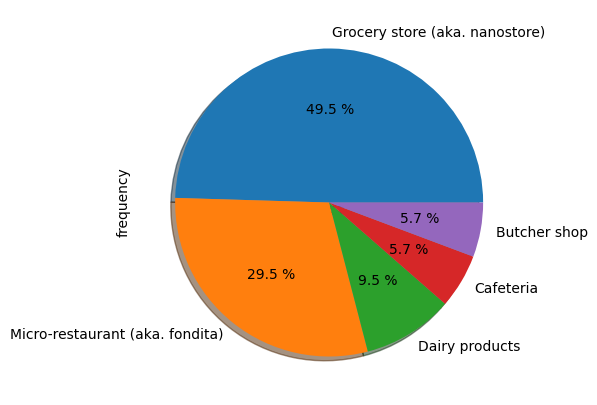

In [400]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

Este tipo de tiendas representan el 61% del total de los datos y de ese 61% se distribuye como se puede observar en la gráfica de pastel.

### Variable 3: 184_store_devices

In [401]:
#Obtengo un análisis univariado de una variable categórica en específico
table3= freq_tbl(filtro['184_store_devices'])
table3

,184_store_devices,frequency,percentage,cumulative_perc
0,Smartphone,52,0.304094,0.304094
1,Analog cash register,16,0.093567,0.397661
2,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.450292
3,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.502924
4,"Analog cash register,Smartphone",8,0.046784,0.549708
5,"Security cameras,Smartphone",7,0.040936,0.590643
6,"Dataphone (i.e. card payments),Security camera...",5,0.029240,0.619883
7,Security cameras,5,0.029240,0.649123
8,POS system (i.e. computer + bar code scanner +...,4,0.023392,0.672515
9,"Analog cash register,Security cameras",4,0.023392,0.695906


In [402]:
f= table3[table3['frequency']>4]
f

,184_store_devices,frequency,percentage,cumulative_perc
0,Smartphone,52,0.304094,0.304094
1,Analog cash register,16,0.093567,0.397661
2,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.450292
3,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.502924
4,"Analog cash register,Smartphone",8,0.046784,0.549708
5,"Security cameras,Smartphone",7,0.040936,0.590643
6,"Dataphone (i.e. card payments),Security camera...",5,0.029240,0.619883
7,Security cameras,5,0.029240,0.649123


In [403]:
Filtro_index= f.set_index('184_store_devices')
Filtro_index

,frequency,percentage,cumulative_perc
184_store_devices,,,
Smartphone,52,0.304094,0.304094
Analog cash register,16,0.093567,0.397661
POS system (i.e. computer + bar code scanner + printer),9,0.052632,0.450292
"POS system (i.e. computer + bar code scanner + printer),Smartphone",9,0.052632,0.502924
"Analog cash register,Smartphone",8,0.046784,0.549708
"Security cameras,Smartphone",7,0.040936,0.590643
"Dataphone (i.e. card payments),Security cameras,Smartphone",5,0.029240,0.619883
Security cameras,5,0.029240,0.649123


Text(0, 0.5, 'Frecuencia')

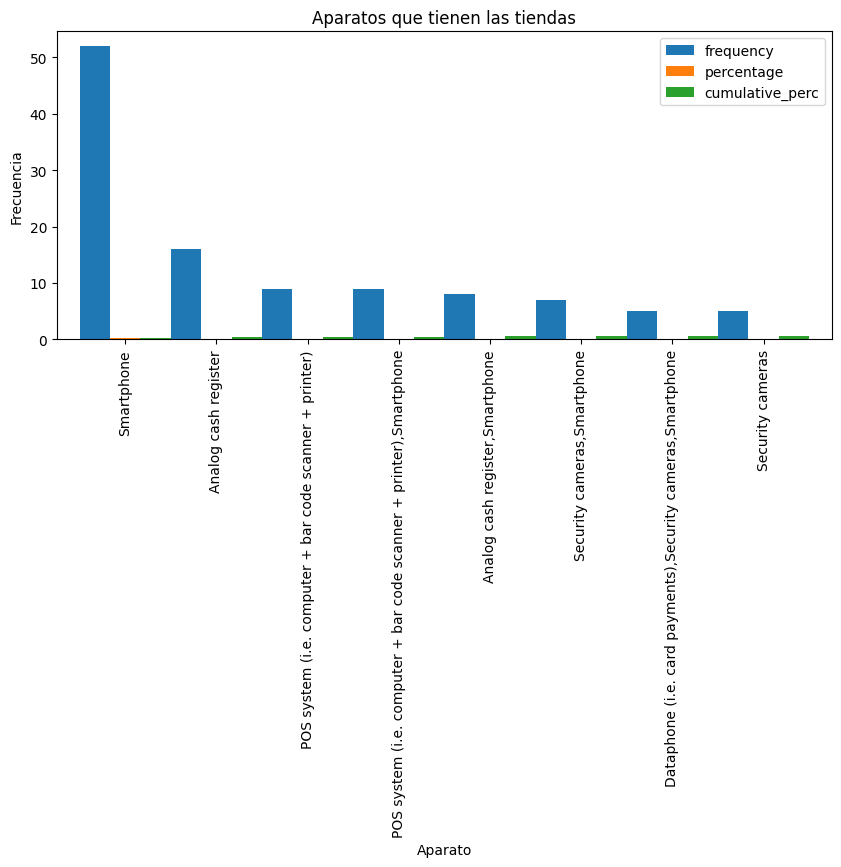

In [404]:
Filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Aparatos que tienen las tiendas')
plt.xlabel('Aparato')
plt.ylabel('Frecuencia')

### Variable 4: 6_change_employees_average_salary_last_year

In [405]:
table4= freq_tbl(filtro['6_change_employees_average_salary_last_year'])
table4

,6_change_employees_average_salary_last_year,frequency,percentage,cumulative_perc
0,Sin registro,86,0.502924,0.502924
1,No cambió,50,0.292398,0.795322
2,Aumentó 15%,14,0.081871,0.877193
3,Disminuyó 15%,5,0.029240,0.906433
4,Aumentó 25%,4,0.023392,0.929825
5,Aumentó 50% o más,4,0.023392,0.953216
6,Disminuyó 25%,3,0.017544,0.970760
7,Dependiente,1,0.005848,0.976608
8,Disminuyó 50% o más,1,0.005848,0.982456
9,0,1,0.005848,0.988304


In [406]:
f= table4[table4['frequency']>3]
f 

,6_change_employees_average_salary_last_year,frequency,percentage,cumulative_perc
0,Sin registro,86,0.502924,0.502924
1,No cambió,50,0.292398,0.795322
2,Aumentó 15%,14,0.081871,0.877193
3,Disminuyó 15%,5,0.029240,0.906433
4,Aumentó 25%,4,0.023392,0.929825
5,Aumentó 50% o más,4,0.023392,0.953216


In [407]:
Filtro_index= f.set_index('6_change_employees_average_salary_last_year')
Filtro_index


,frequency,percentage,cumulative_perc
6_change_employees_average_salary_last_year,,,
Sin registro,86,0.502924,0.502924
No cambió,50,0.292398,0.795322
Aumentó 15%,14,0.081871,0.877193
Disminuyó 15%,5,0.029240,0.906433
Aumentó 25%,4,0.023392,0.929825
Aumentó 50% o más,4,0.023392,0.953216


<Axes: xlabel='6_change_employees_average_salary_last_year'>

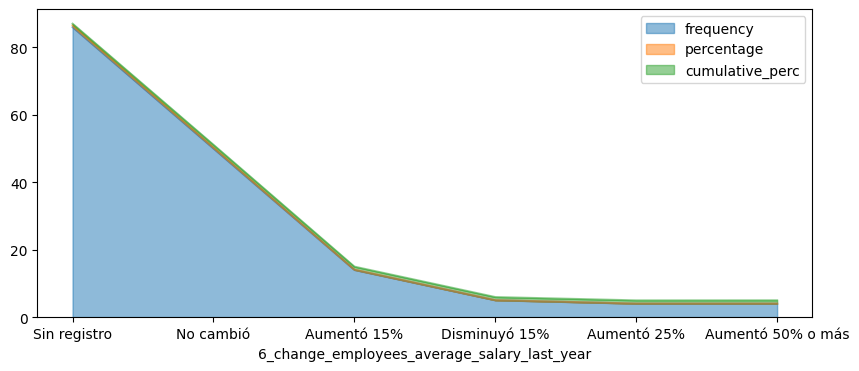

In [408]:
#Realizamos grafico de área del dataframe filtrado
Filtro_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

<Axes: ylabel='frequency'>

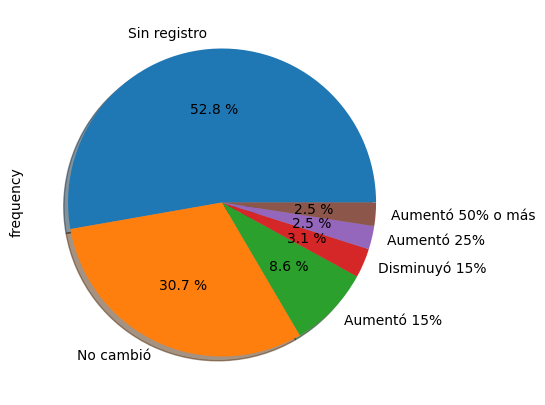

In [409]:
Filtro_index['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

### Variable 5: 49_inventory_records

In [410]:
table5= freq_tbl(filtro['49_inventory_records'])
table5

,49_inventory_records,frequency,percentage,cumulative_perc
0,Sin registro,61,0.356725,0.356725
1,En papel,40,0.233918,0.590643
2,Software especializado + computadora,21,0.122807,0.713450
3,En Excel,20,0.116959,0.830409
4,No lo hago,18,0.105263,0.935673
5,"En Excel,En papel",7,0.040936,0.976608
6,Mentalmente,1,0.005848,0.982456
7,Aplicación móvil (i.e. App) + smartphone,1,0.005848,0.988304
8,"En papel,Mental",1,0.005848,0.994152
9,"Aplicación móvil (i.e. App) + smartphone,En Excel",1,0.005848,1.000000


In [411]:
f= table5[table5['frequency']>5]
f

,49_inventory_records,frequency,percentage,cumulative_perc
0,Sin registro,61,0.356725,0.356725
1,En papel,40,0.233918,0.590643
2,Software especializado + computadora,21,0.122807,0.713450
3,En Excel,20,0.116959,0.830409
4,No lo hago,18,0.105263,0.935673
5,"En Excel,En papel",7,0.040936,0.976608


In [412]:
Filtro_index= f.set_index('49_inventory_records')
Filtro_index

,frequency,percentage,cumulative_perc
49_inventory_records,,,
Sin registro,61,0.356725,0.356725
En papel,40,0.233918,0.590643
Software especializado + computadora,21,0.122807,0.713450
En Excel,20,0.116959,0.830409
No lo hago,18,0.105263,0.935673
"En Excel,En papel",7,0.040936,0.976608


<Axes: ylabel='frequency'>

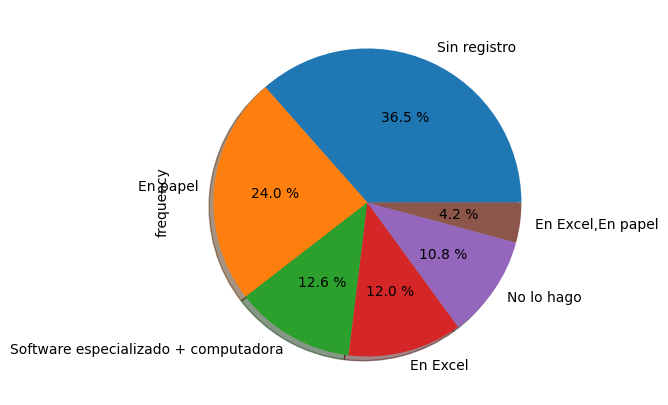

In [413]:
Filtro_index['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

### Variable 6: 18_sales_records

In [414]:
table6= freq_tbl(filtro['18_sales_records'])
table6

,18_sales_records,frequency,percentage,cumulative_perc
0,Sin registro,61,0.356725,0.356725
1,En papel,47,0.274854,0.631579
2,Software especializado + computadora,22,0.128655,0.760234
3,No lo hago,14,0.081871,0.842105
4,En Excel,10,0.058480,0.900585
5,Caja registradora (análoga),4,0.023392,0.923977
6,"En Excel,En papel",4,0.023392,0.947368
7,Aplicación móvil (i.e. App) + smartphone,1,0.005848,0.953216
8,"Aplicación móvil (i.e. App) + smartphone,Caja ...",1,0.005848,0.959064
9,Contadora,1,0.005848,0.964912


In [415]:
f= table6[table6['frequency']>3]
f

,18_sales_records,frequency,percentage,cumulative_perc
0,Sin registro,61,0.356725,0.356725
1,En papel,47,0.274854,0.631579
2,Software especializado + computadora,22,0.128655,0.760234
3,No lo hago,14,0.081871,0.842105
4,En Excel,10,0.058480,0.900585
5,Caja registradora (análoga),4,0.023392,0.923977
6,"En Excel,En papel",4,0.023392,0.947368


In [416]:
Filtro_index= f.set_index('18_sales_records')
Filtro_index

,frequency,percentage,cumulative_perc
18_sales_records,,,
Sin registro,61,0.356725,0.356725
En papel,47,0.274854,0.631579
Software especializado + computadora,22,0.128655,0.760234
No lo hago,14,0.081871,0.842105
En Excel,10,0.058480,0.900585
Caja registradora (análoga),4,0.023392,0.923977
"En Excel,En papel",4,0.023392,0.947368


Text(0, 0.5, 'Frecuencia')

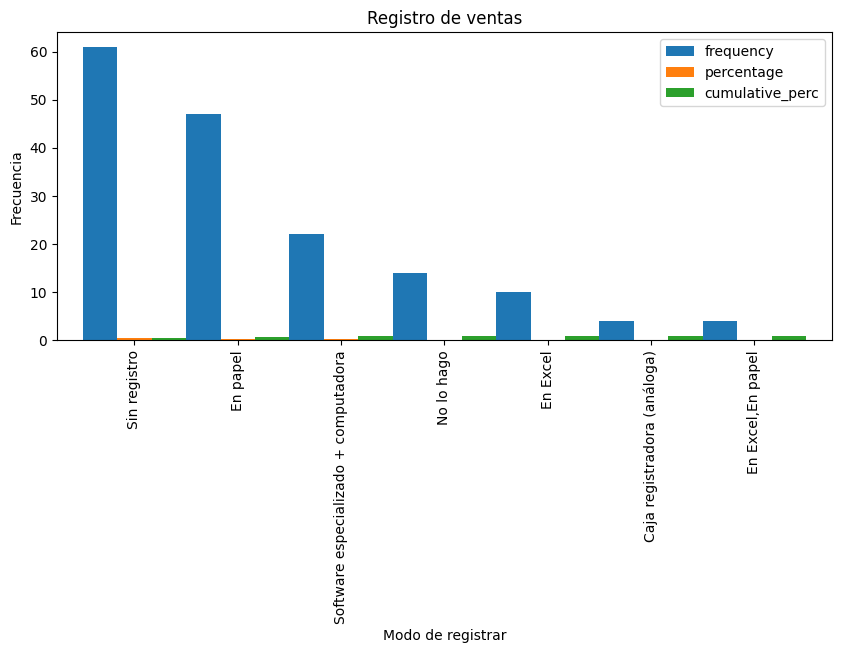

In [417]:
Filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Registro de ventas')
plt.xlabel('Modo de registrar')
plt.ylabel('Frecuencia')

### Variable 7: 186_internet_connection

In [418]:
table7= freq_tbl(filtro['186_internet_connection'])
table7

,186_internet_connection,frequency,percentage,cumulative_perc
0,yes,76,0.444444,0.444444
1,Sin registro,63,0.368421,0.812865
2,no,32,0.187135,1.000000


In [419]:
Filtro_index= table7.set_index('186_internet_connection')
Filtro_index

,frequency,percentage,cumulative_perc
186_internet_connection,,,
yes,76,0.444444,0.444444
Sin registro,63,0.368421,0.812865
no,32,0.187135,1.000000


Text(0.5, 1.0, 'Tiendas que cuentan con internet')

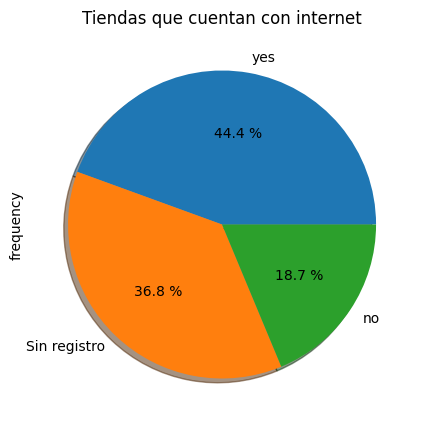

In [420]:
Filtro_index['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")
plt.title('Tiendas que cuentan con internet')

### Variable 8: 210_sales_channels

In [421]:
table8= freq_tbl(filtro['210_sales_channels'])
table8


,210_sales_channels,frequency,percentage,cumulative_perc
0,Sin registro,89,0.520468,0.520468
1,"Redes sociales (e.g. Facebook, Instagram)",11,0.064327,0.584795
2,WhatsApp,10,0.058480,0.643275
3,"Redes sociales (e.g. Facebook, Instagram),What...",9,0.052632,0.695906
4,Llamada a Teléfono fijo,6,0.035088,0.730994
5,"Llamada a Teléfono celular,WhatsApp",6,0.035088,0.766082
6,Llamada a Teléfono celular,5,0.029240,0.795322
7,"Llamada a Teléfono celular,Redes sociales (e.g...",5,0.029240,0.824561
8,"Llamada a Teléfono celular,Llamada a Teléfono ...",3,0.017544,0.842105
9,Ninguno,3,0.017544,0.859649


In [422]:
f= table8[table8['frequency']>4]
f

,210_sales_channels,frequency,percentage,cumulative_perc
0,Sin registro,89,0.520468,0.520468
1,"Redes sociales (e.g. Facebook, Instagram)",11,0.064327,0.584795
2,WhatsApp,10,0.058480,0.643275
3,"Redes sociales (e.g. Facebook, Instagram),What...",9,0.052632,0.695906
4,Llamada a Teléfono fijo,6,0.035088,0.730994
5,"Llamada a Teléfono celular,WhatsApp",6,0.035088,0.766082
6,Llamada a Teléfono celular,5,0.029240,0.795322
7,"Llamada a Teléfono celular,Redes sociales (e.g...",5,0.029240,0.824561


In [423]:
Filtro_index= f.set_index('210_sales_channels')
Filtro_index

,frequency,percentage,cumulative_perc
210_sales_channels,,,
Sin registro,89,0.520468,0.520468
"Redes sociales (e.g. Facebook, Instagram)",11,0.064327,0.584795
WhatsApp,10,0.058480,0.643275
"Redes sociales (e.g. Facebook, Instagram),WhatsApp",9,0.052632,0.695906
Llamada a Teléfono fijo,6,0.035088,0.730994
"Llamada a Teléfono celular,WhatsApp",6,0.035088,0.766082
Llamada a Teléfono celular,5,0.029240,0.795322
"Llamada a Teléfono celular,Redes sociales (e.g. Facebook, Instagram),WhatsApp",5,0.029240,0.824561


Text(0, 0.5, 'Frecuencia')

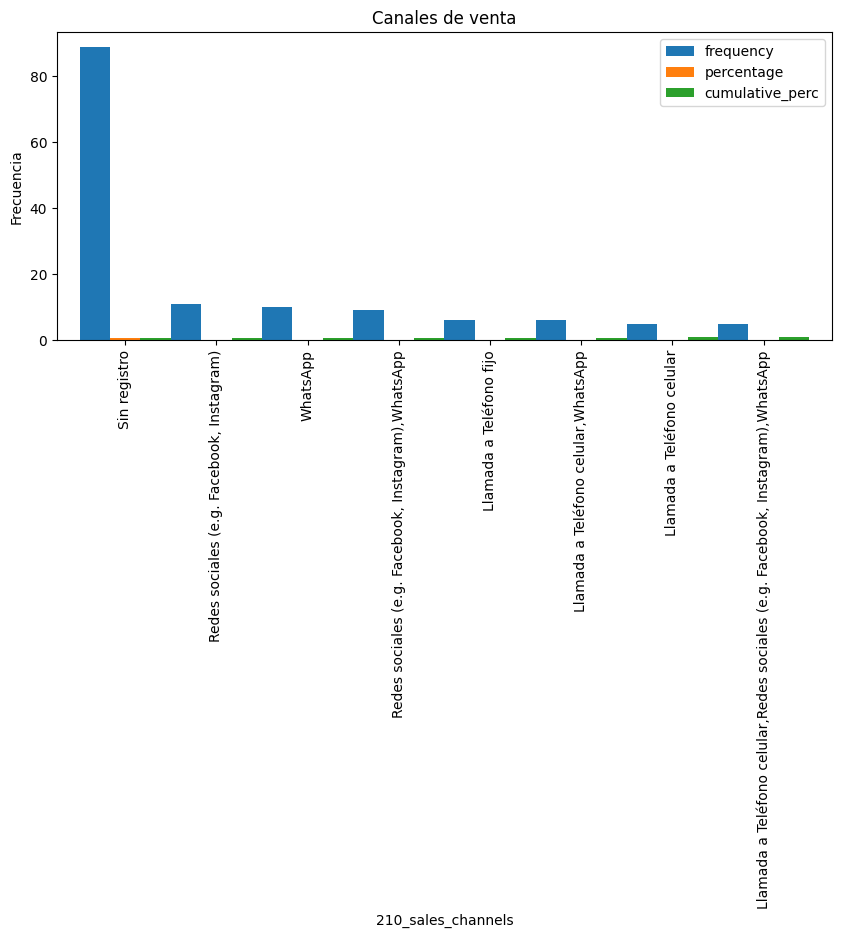

In [424]:
Filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Canales de venta')
#plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')


### Variable 9: 189_payment_methods

In [425]:
table9= freq_tbl(filtro['189_payment_methods'])
table9

,189_payment_methods,frequency,percentage,cumulative_perc
0,Sin registro,64,0.374269,0.374269
1,Efectivo,40,0.233918,0.608187
2,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",30,0.175439,0.783626
3,"Efectivo,Tarjeta de débito y/o crédito",19,0.111111,0.894737
4,"Efectivo,Transferencia interbancaria",15,0.087719,0.982456
5,"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta ...",1,0.005848,0.988304
6,"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta ...",1,0.005848,0.994152
7,Tarjeta de débito y/o crédito,1,0.005848,1.000000


In [426]:
f= table9[table9['frequency']>14]
f

,189_payment_methods,frequency,percentage,cumulative_perc
0,Sin registro,64,0.374269,0.374269
1,Efectivo,40,0.233918,0.608187
2,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",30,0.175439,0.783626
3,"Efectivo,Tarjeta de débito y/o crédito",19,0.111111,0.894737
4,"Efectivo,Transferencia interbancaria",15,0.087719,0.982456


In [427]:
Filtro_index= f.set_index('189_payment_methods')
Filtro_index

,frequency,percentage,cumulative_perc
189_payment_methods,,,
Sin registro,64,0.374269,0.374269
Efectivo,40,0.233918,0.608187
"Efectivo,Tarjeta de débito y/o crédito,Transferencia interbancaria",30,0.175439,0.783626
"Efectivo,Tarjeta de débito y/o crédito",19,0.111111,0.894737
"Efectivo,Transferencia interbancaria",15,0.087719,0.982456


Text(0.5, 1.0, 'Métodos de pago más usados')

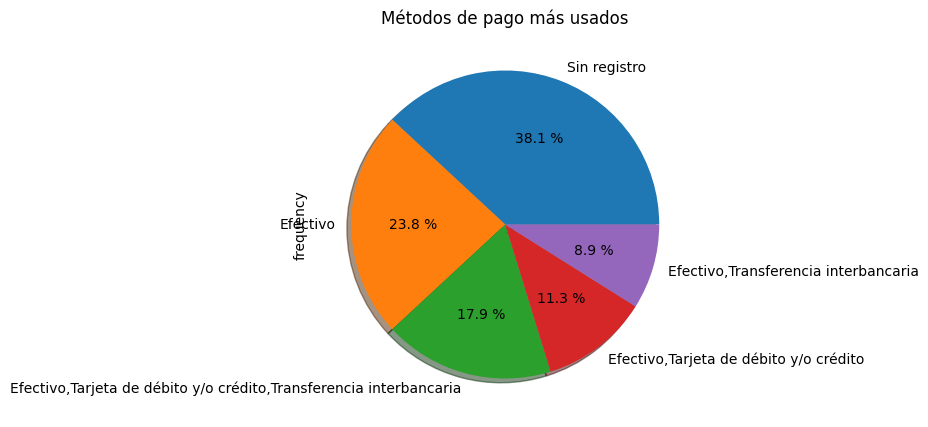

In [428]:
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")
plt.title('Métodos de pago más usados')

### Variable 10: 214_customer_relationship_tools

In [429]:
table10= freq_tbl(filtro['214_customer_relationship_tools'])
table10

,214_customer_relationship_tools,frequency,percentage,cumulative_perc
0,Sin registro,76,0.444444,0.444444
1,Redes sociales,27,0.157895,0.602339
2,Aplicación móvil,21,0.122807,0.725146
3,Ninguna,20,0.116959,0.842105
4,"Aplicación móvil,Redes sociales",13,0.076023,0.918129
5,Cuaderno,6,0.035088,0.953216
6,Teléfono,1,0.005848,0.959064
7,"Cuaderno,Redes sociales",1,0.005848,0.964912
8,"Aplicación móvil,De frente",1,0.005848,0.970760
9,Físico,1,0.005848,0.976608


In [430]:
f= table10[table10['frequency']>5]
f

,214_customer_relationship_tools,frequency,percentage,cumulative_perc
0,Sin registro,76,0.444444,0.444444
1,Redes sociales,27,0.157895,0.602339
2,Aplicación móvil,21,0.122807,0.725146
3,Ninguna,20,0.116959,0.842105
4,"Aplicación móvil,Redes sociales",13,0.076023,0.918129
5,Cuaderno,6,0.035088,0.953216


In [431]:
Filtro_index= f.set_index('214_customer_relationship_tools')
Filtro_index

,frequency,percentage,cumulative_perc
214_customer_relationship_tools,,,
Sin registro,76,0.444444,0.444444
Redes sociales,27,0.157895,0.602339
Aplicación móvil,21,0.122807,0.725146
Ninguna,20,0.116959,0.842105
"Aplicación móvil,Redes sociales",13,0.076023,0.918129
Cuaderno,6,0.035088,0.953216


<Axes: xlabel='214_customer_relationship_tools'>

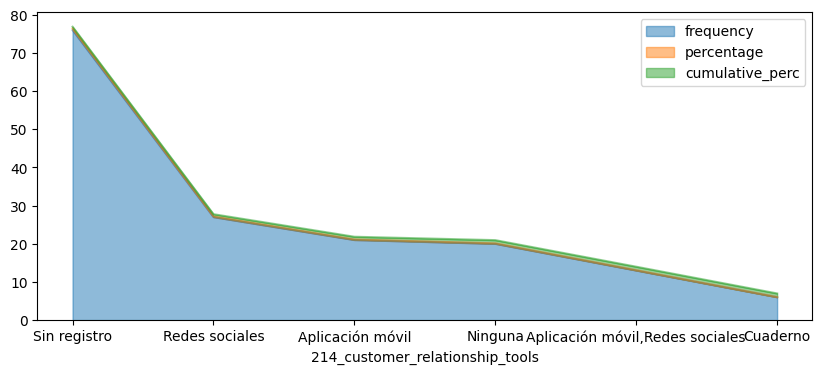

In [432]:
Filtro_index.plot(kind='area', figsize=(10,4),alpha = 0.5)


### Variable 11: 33_credit_to_customers

In [433]:
table11= freq_tbl(filtro['33_credit_to_customers'])
table11

,33_credit_to_customers,frequency,percentage,cumulative_perc
0,no,80,0.467836,0.467836
1,Sin registro,64,0.374269,0.842105
2,yes,27,0.157895,1.000000


In [434]:
Filtro_index= table11.set_index('33_credit_to_customers')
Filtro_index

,frequency,percentage,cumulative_perc
33_credit_to_customers,,,
no,80,0.467836,0.467836
Sin registro,64,0.374269,0.842105
yes,27,0.157895,1.000000


Text(0.5, 1.0, 'Se les otorga crédito a los clientes')

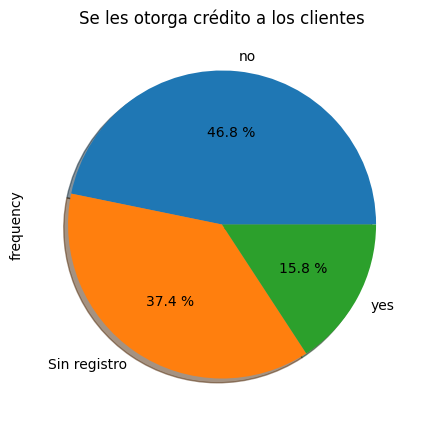

In [435]:
Filtro_index['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")
plt.title('Se les otorga crédito a los clientes')

### Variable 12: 35_interest_rate

In [436]:
table12= freq_tbl(filtro['35_interest_rate'])
table12

,35_interest_rate,frequency,percentage,cumulative_perc
0,Sin registro,150,0.877193,0.877193
1,no,21,0.122807,1.000000


In [437]:
Filtro_index= table12.set_index('35_interest_rate')
Filtro_index

,frequency,percentage,cumulative_perc
35_interest_rate,,,
Sin registro,150,0.877193,0.877193
no,21,0.122807,1.000000


Text(0.5, 1.0, 'Tasa de interés')

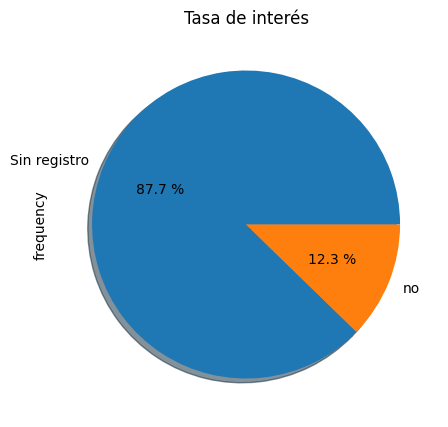

In [438]:
Filtro_index['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")
plt.title('Tasa de interés')

### Variable 13: 312_payment_of_utilities

In [439]:
table13= freq_tbl(filtro['312_payment_of_utilities'])
table13 

,312_payment_of_utilities,frequency,percentage,cumulative_perc
0,Sin registro,105,0.614035,0.614035
1,Totalmente en desacuerdo,46,0.269006,0.883041
2,Totalmente de acuerdo,9,0.052632,0.935673
3,Algo de acuerdo,5,0.029240,0.964912
4,Ni de acuerdo ni en desacuerdo,4,0.023392,0.988304
5,Algo en desacuerdo,2,0.011696,1.000000


In [440]:
Filtro_index= table13.set_index('312_payment_of_utilities')
Filtro_index

,frequency,percentage,cumulative_perc
312_payment_of_utilities,,,
Sin registro,105,0.614035,0.614035
Totalmente en desacuerdo,46,0.269006,0.883041
Totalmente de acuerdo,9,0.052632,0.935673
Algo de acuerdo,5,0.029240,0.964912
Ni de acuerdo ni en desacuerdo,4,0.023392,0.988304
Algo en desacuerdo,2,0.011696,1.000000


Text(0, 0.5, 'Frecuencia')

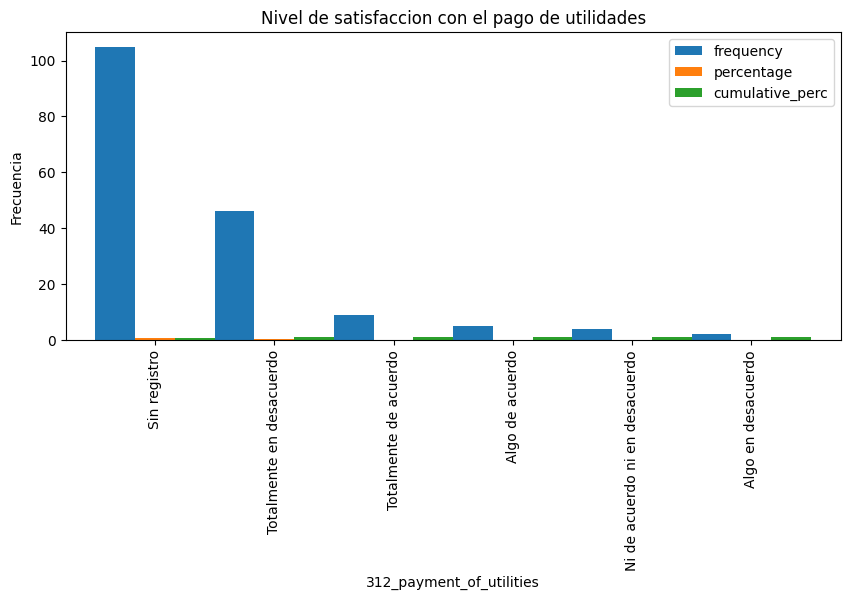

In [441]:
Filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Nivel de satisfaccion con el pago de utilidades')
#plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

### Variable 14: 69_why_not_services

In [442]:
table14= freq_tbl(filtro['69_why_not_services'])
table14


,69_why_not_services,frequency,percentage,cumulative_perc
0,Sin registro,130,0.760234,0.760234
1,No quiero involucrarme con la tecnología,7,0.040936,0.801170
2,No conozco los servicios,7,0.040936,0.842105
3,No creo que represente grandes ingresos,6,0.035088,0.877193
4,Es muy caro,4,0.023392,0.900585
5,"No conozco los servicios,No quiero involucrarm...",2,0.011696,0.912281
6,no es requerido,1,0.005848,0.918129
7,No sabe cómo involucrarse,1,0.005848,0.923977
8,Se quiere involucrar,1,0.005848,0.929825
9,Se vende ropa,1,0.005848,0.935673


In [443]:
f= table14[table14['frequency']>1]
f

,69_why_not_services,frequency,percentage,cumulative_perc
0,Sin registro,130,0.760234,0.760234
1,No quiero involucrarme con la tecnología,7,0.040936,0.801170
2,No conozco los servicios,7,0.040936,0.842105
3,No creo que represente grandes ingresos,6,0.035088,0.877193
4,Es muy caro,4,0.023392,0.900585
5,"No conozco los servicios,No quiero involucrarm...",2,0.011696,0.912281


In [444]:
Filtro_index= f.set_index('69_why_not_services')
Filtro_index

,frequency,percentage,cumulative_perc
69_why_not_services,,,
Sin registro,130,0.760234,0.760234
No quiero involucrarme con la tecnología,7,0.040936,0.801170
No conozco los servicios,7,0.040936,0.842105
No creo que represente grandes ingresos,6,0.035088,0.877193
Es muy caro,4,0.023392,0.900585
"No conozco los servicios,No quiero involucrarme con la tecnología",2,0.011696,0.912281


Text(0, 0.5, 'Frecuencia')

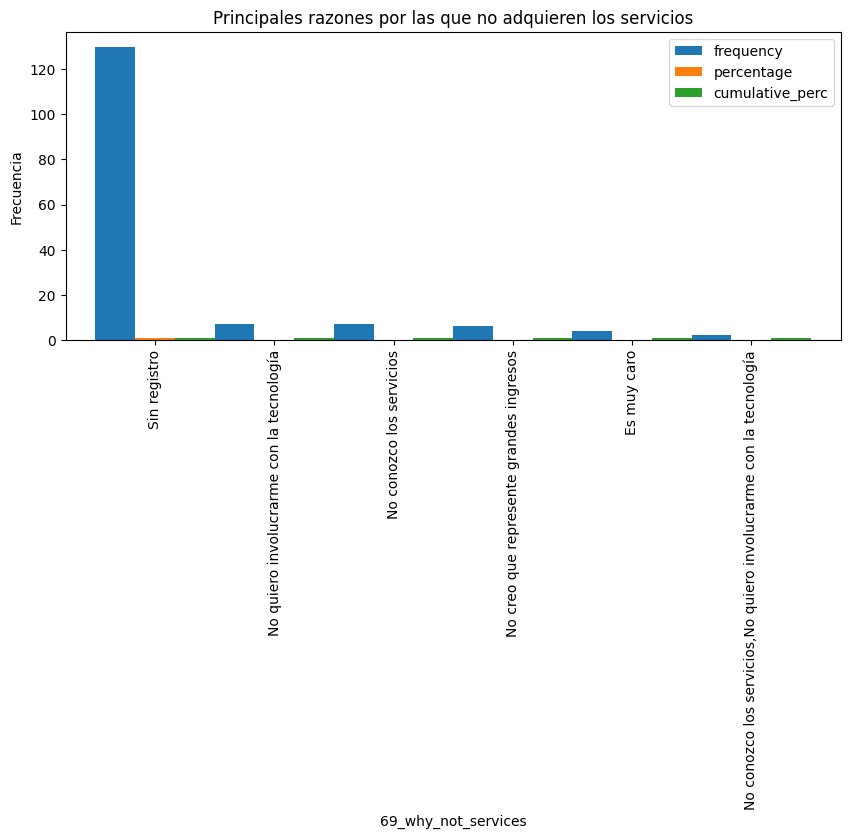

In [445]:
Filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Principales razones por las que no adquieren los servicios')
plt.ylabel('Frecuencia')

### Variable 15: 313_home_deliveries

In [446]:
table15= freq_tbl(filtro['313_home_deliveries'])
table15

,313_home_deliveries,frequency,percentage,cumulative_perc
0,Sin registro,113,0.660819,0.660819
1,Totalmente en desacuerdo,25,0.146199,0.807018
2,Totalmente de acuerdo,14,0.081871,0.888889
3,Algo de acuerdo,11,0.064327,0.953216
4,Algo en desacuerdo,5,0.029240,0.982456
5,Ni de acuerdo ni en desacuerdo,3,0.017544,1.000000


In [447]:
Filtro_index= table15.set_index('313_home_deliveries')
Filtro_index

,frequency,percentage,cumulative_perc
313_home_deliveries,,,
Sin registro,113,0.660819,0.660819
Totalmente en desacuerdo,25,0.146199,0.807018
Totalmente de acuerdo,14,0.081871,0.888889
Algo de acuerdo,11,0.064327,0.953216
Algo en desacuerdo,5,0.029240,0.982456
Ni de acuerdo ni en desacuerdo,3,0.017544,1.000000


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 [Text(-1.0, 0, 'Ni de acuerdo ni en desacuerdo'),
  Text(0.0, 0, 'Sin registro'),
  Text(1.0, 0, 'Totalmente en desacuerdo'),
  Text(2.0, 0, 'Totalmente de acuerdo'),
  Text(3.0, 0, 'Algo de acuerdo'),
  Text(4.0, 0, 'Algo en desacuerdo'),
  Text(5.0, 0, 'Ni de acuerdo ni en desacuerdo'),
  Text(6.0, 0, '')])

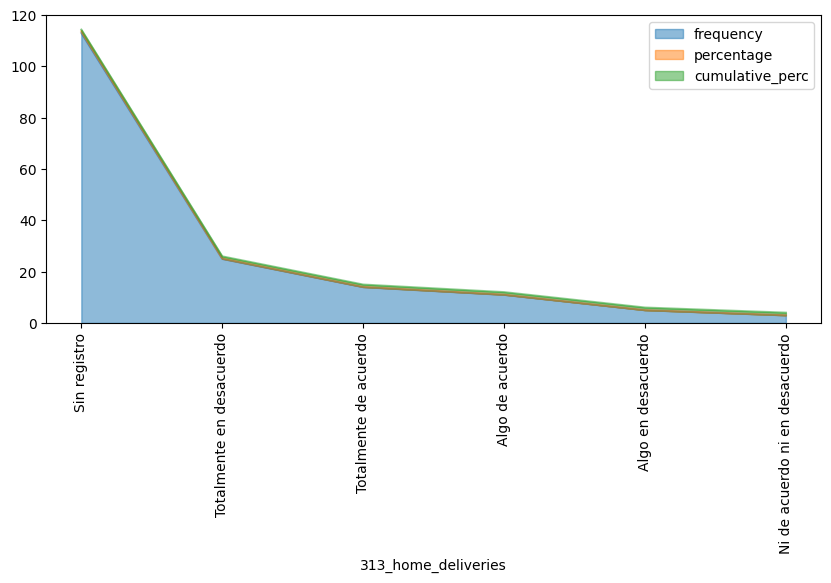

In [448]:
Filtro_index.plot(kind='area', figsize=(10,4),alpha = 0.5,)
plt.xticks(rotation=90)

### Variable 16: 44_willingness_inventory_management_suppliers

In [449]:
table16= freq_tbl(filtro['44_willingness_inventory_management_suppliers'])
table16


,44_willingness_inventory_management_suppliers,frequency,percentage,cumulative_perc
0,Sin registro,92,0.538012,0.538012
1,Totalmente en desacuerdo,58,0.339181,0.877193
2,Algo en desacuerdo,8,0.046784,0.923977
3,Ni de acuerdo ni en desacuerdo,5,0.029240,0.953216
4,Algo de acuerdo,5,0.029240,0.982456
5,Totalmente de acuerdo,3,0.017544,1.000000


In [450]:
Filtro_index= table16.set_index('44_willingness_inventory_management_suppliers')
Filtro_index

,frequency,percentage,cumulative_perc
44_willingness_inventory_management_suppliers,,,
Sin registro,92,0.538012,0.538012
Totalmente en desacuerdo,58,0.339181,0.877193
Algo en desacuerdo,8,0.046784,0.923977
Ni de acuerdo ni en desacuerdo,5,0.029240,0.953216
Algo de acuerdo,5,0.029240,0.982456
Totalmente de acuerdo,3,0.017544,1.000000


<Axes: ylabel='frequency'>

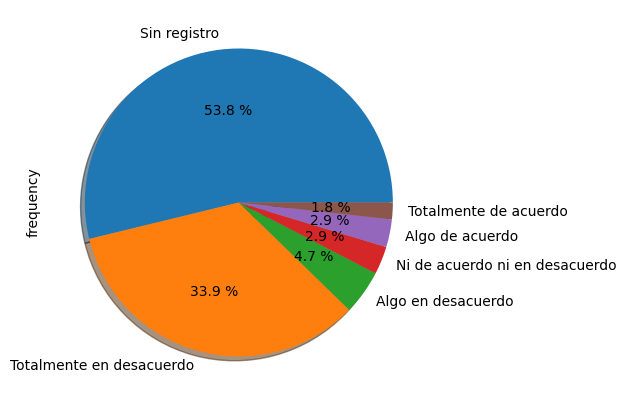

In [451]:
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")


### Variable 17: 46_willingness_reorder_suppliers_variety

In [452]:
table17= freq_tbl(filtro['46_willingness_reorder_suppliers_variety'])
table17

,46_willingness_reorder_suppliers_variety,frequency,percentage,cumulative_perc
0,Sin registro,97,0.567251,0.567251
1,Totalmente en desacuerdo,33,0.192982,0.760234
2,Totalmente de acuerdo,15,0.087719,0.847953
3,Algo de acuerdo,14,0.081871,0.929825
4,Algo en desacuerdo,7,0.040936,0.970760
5,Ni de acuerdo ni en desacuerdo,5,0.029240,1.000000


In [453]:
Filtro_index= table17.set_index('46_willingness_reorder_suppliers_variety')
Filtro_index

,frequency,percentage,cumulative_perc
46_willingness_reorder_suppliers_variety,,,
Sin registro,97,0.567251,0.567251
Totalmente en desacuerdo,33,0.192982,0.760234
Totalmente de acuerdo,15,0.087719,0.847953
Algo de acuerdo,14,0.081871,0.929825
Algo en desacuerdo,7,0.040936,0.970760
Ni de acuerdo ni en desacuerdo,5,0.029240,1.000000


Text(0, 0.5, 'Frecuencia')

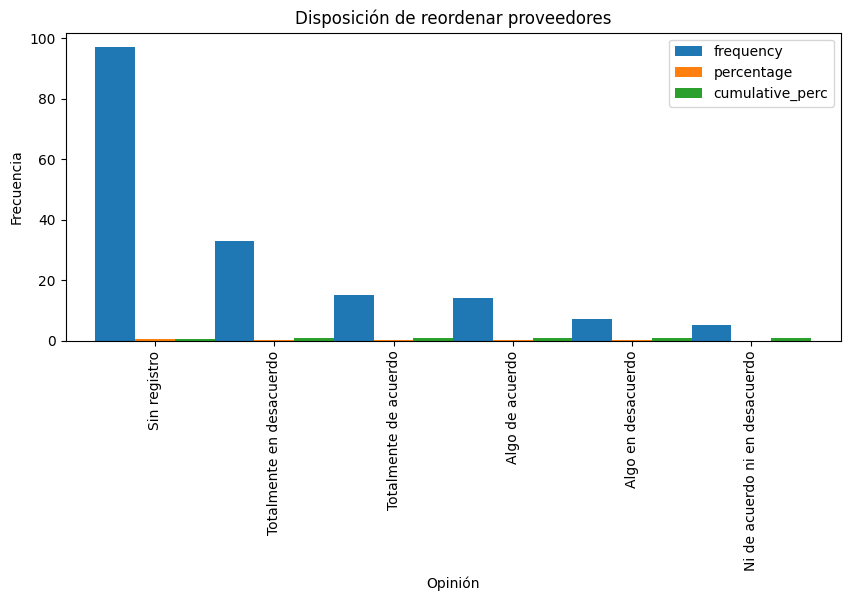

In [454]:
Filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Disposición de reordenar proveedores')
plt.xlabel('Opinión')
plt.ylabel('Frecuencia')

### Variable 18: 157_frequency_organize_shelves

In [455]:
table18= freq_tbl(filtro['157_frequency_organize_shelves'])
table18


,157_frequency_organize_shelves,frequency,percentage,cumulative_perc
0,Sin registro,75,0.438596,0.438596
1,Semanalmente,40,0.233918,0.672515
2,Diariamente,32,0.187135,0.859649
3,Nunca,8,0.046784,0.906433
4,Mensualmente,7,0.040936,0.947368
5,Quincenalmente,5,0.029240,0.976608
6,Anualmente,2,0.011696,0.988304
7,Semestralmente,1,0.005848,0.994152
8,No se tiene,1,0.005848,1.000000


In [456]:
Filtro_index= table18.set_index('157_frequency_organize_shelves')
Filtro_index

,frequency,percentage,cumulative_perc
157_frequency_organize_shelves,,,
Sin registro,75,0.438596,0.438596
Semanalmente,40,0.233918,0.672515
Diariamente,32,0.187135,0.859649
Nunca,8,0.046784,0.906433
Mensualmente,7,0.040936,0.947368
Quincenalmente,5,0.029240,0.976608
Anualmente,2,0.011696,0.988304
Semestralmente,1,0.005848,0.994152
No se tiene,1,0.005848,1.000000


In [ ]:
Filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Frecuencia de organización de los estantes')
#plt.xlabel('Opinión')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

### Variable 19: 250_technology_investment_operations

In [ ]:
table19= freq_tbl(filtro['250_technology_investment_operations'])
table19


In [ ]:
Filtro_index= table19.set_index('250_technology_investment_operations')
Filtro_index

In [ ]:
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")
plt.title('Operaciones de inversión en tecnología')

### Variable 20: 261_technology_organization

In [ ]:
table20= freq_tbl(filtro['261_technology_organization'])
table20

In [ ]:
Filtro_index= table20.set_index('261_technology_organization')
Filtro_index

In [ ]:
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")
plt.title('Organización de la tecnología')